# Downloading libraries and preparing data


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!rm data2.zip
!ln -s /content/drive/MyDrive/data2.zip /content/data2.zip
!unzip -q ./data2.zip

Mounted at /content/drive
rm: cannot remove 'data2.zip': No such file or directory


In [2]:
from models import *
import torch
!pip3 install torchaudio
from torch.optim import SGD, Adam, RMSprop, lr_scheduler
from train_rnn import train_network, evaluate_network
from load_data import load_data

     |████████████████████████████████| 1.9MB 7.2MB/s 


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

(train_loader, val_loader, test_loader), labels = load_data(root='data2/train')

correct_labels = ['yes', 'no', 'up', 'down', 'left',
                  'right', 'on', 'off', 'stop', 'go', 'silence']
correct_index = [torch.tensor(labels.index(x)) for x in correct_labels]

cuda
Number of train instances:  60775
Number of validation instances:  3095
Number of test instances:  3085


# Training RNN - an example

## Hidden size: 16, Learning rate: 0.01

In [ ]:
model = RNN(n_output=32, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

In [ ]:
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.3999738241075637
Accuracy on training set:  4.9806663924310985


 10%|█         | 1/10 [00:23<03:28, 23.13s/it]


Accuracy on validation set:  5.815831987075929
--------------------

Loss on training set:  3.33284680126038
Accuracy on training set:  6.505964623611683


 20%|██        | 2/10 [00:45<03:03, 22.97s/it]


Accuracy on validation set:  2.617124394184168
--------------------

Loss on training set:  3.3086695262307937
Accuracy on training set:  6.756067461949815


 30%|███       | 3/10 [01:08<02:40, 22.86s/it]


Accuracy on validation set:  3.263327948303716
--------------------

Loss on training set:  3.2963748262665096
Accuracy on training set:  6.807075277663513


 40%|████      | 4/10 [01:31<02:17, 22.84s/it]


Accuracy on validation set:  5.234248788368336
--------------------

Loss on training set:  3.2897656909412243
Accuracy on training set:  7.144385026737968


 50%|█████     | 5/10 [01:53<01:53, 22.76s/it]


Accuracy on validation set:  2.4878836833602587
--------------------

Loss on training set:  3.2884455343903167
Accuracy on training set:  7.155902920608803


 60%|██████    | 6/10 [02:16<01:31, 22.77s/it]


Accuracy on validation set:  4.2326332794830375
--------------------

Loss on training set:  3.285660728841395
Accuracy on training set:  7.029206088029618


 70%|███████   | 7/10 [02:39<01:08, 22.73s/it]


Accuracy on validation set:  2.2294022617124396
--------------------

Loss on training set:  3.28077353138141
Accuracy on training set:  7.308926367749897


 80%|████████  | 8/10 [03:01<00:45, 22.74s/it]


Accuracy on validation set:  2.7463651050080777
--------------------

Loss on training set:  3.2812220312273097
Accuracy on training set:  7.39613327848622


 90%|█████████ | 9/10 [03:24<00:22, 22.69s/it]


Accuracy on validation set:  3.101777059773829
--------------------

Loss on training set:  3.27812286815149
Accuracy on training set:  7.430686960098725


100%|██████████| 10/10 [03:46<00:00, 22.69s/it]


Accuracy on validation set:  3.489499192245557
--------------------


In [ ]:
# train_network(model, train_loader, val_loader, correct_index, 1, optimizer=optimizer, print_results=True, print_classes=True)

# Different numbers of features in hidden state

## Hidden size: 16, Learing rate: 0.001

In [ ]:
model = RNN(n_output=32, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4402548409214435
Accuracy on training set:  4.286301933360757


 10%|█         | 1/10 [00:22<03:21, 22.42s/it]


Accuracy on validation set:  1.2277867528271404
--------------------

Loss on training set:  3.3637186842816007
Accuracy on training set:  7.684080625257096


 20%|██        | 2/10 [00:44<02:59, 22.46s/it]


Accuracy on validation set:  1.8416801292407108
--------------------

Loss on training set:  3.2490977327934463
Accuracy on training set:  11.106540518305223


 30%|███       | 3/10 [01:07<02:38, 22.60s/it]


Accuracy on validation set:  3.004846526655897
--------------------

Loss on training set:  3.11204370519449
Accuracy on training set:  14.486219662690251


 40%|████      | 4/10 [01:31<02:17, 22.87s/it]


Accuracy on validation set:  3.521809369951535
--------------------

Loss on training set:  2.9881809357211995
Accuracy on training set:  17.589469354175236


 50%|█████     | 5/10 [01:54<01:55, 23.09s/it]


Accuracy on validation set:  4.038772213247173
--------------------

Loss on training set:  2.879282461991775
Accuracy on training set:  20.375154257507198


 60%|██████    | 6/10 [02:18<01:33, 23.32s/it]


Accuracy on validation set:  3.877221324717286
--------------------

Loss on training set:  2.786054620287733
Accuracy on training set:  22.99958864664747


 70%|███████   | 7/10 [02:42<01:10, 23.39s/it]


Accuracy on validation set:  4.038772213247173
--------------------

Loss on training set:  2.7008167175087405
Accuracy on training set:  25.39531057178116


 80%|████████  | 8/10 [03:05<00:46, 23.41s/it]


Accuracy on validation set:  4.2326332794830375
--------------------

Loss on training set:  2.6291314831431243
Accuracy on training set:  27.310571781160018


 90%|█████████ | 9/10 [03:28<00:23, 23.24s/it]


Accuracy on validation set:  4.523424878836834
--------------------

Loss on training set:  2.5619046241410324
Accuracy on training set:  29.135335252982312


100%|██████████| 10/10 [03:51<00:00, 23.15s/it]


Accuracy on validation set:  4.491114701130856
--------------------


## Hidden size: 32, Learning rate: 0.001 

In [ ]:
model = RNN(n_output=32, n_hidden=32, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.430895188863951
Accuracy on training set:  4.416289592760181


 10%|█         | 1/10 [00:22<03:21, 22.44s/it]


Accuracy on validation set:  1.5508885298869144
--------------------

Loss on training set:  3.3198724586136885
Accuracy on training set:  9.410119292472233


 20%|██        | 2/10 [00:44<02:59, 22.45s/it]


Accuracy on validation set:  3.231017770597738
--------------------

Loss on training set:  3.125703881666622
Accuracy on training set:  15.080213903743315


 30%|███       | 3/10 [01:07<02:36, 22.42s/it]


Accuracy on validation set:  3.780290791599354
--------------------

Loss on training set:  2.916869738491314
Accuracy on training set:  20.694364459070343


 40%|████      | 4/10 [01:29<02:14, 22.37s/it]


Accuracy on validation set:  3.9418416801292406
--------------------

Loss on training set:  2.726771487671865
Accuracy on training set:  25.964623611682434


 50%|█████     | 5/10 [01:51<01:51, 22.36s/it]


Accuracy on validation set:  3.9418416801292406
--------------------

Loss on training set:  2.562332924384239
Accuracy on training set:  30.733031674208146


 60%|██████    | 6/10 [02:14<01:29, 22.34s/it]


Accuracy on validation set:  3.8449111470113086
--------------------

Loss on training set:  2.422982509747203
Accuracy on training set:  34.634306869600984


 70%|███████   | 7/10 [02:36<01:06, 22.33s/it]


Accuracy on validation set:  3.6833602584814216
--------------------

Loss on training set:  2.3025152918832483
Accuracy on training set:  38.323323735088444


 80%|████████  | 8/10 [02:58<00:44, 22.34s/it]


Accuracy on validation set:  4.458804523424879
--------------------

Loss on training set:  2.202101674168162
Accuracy on training set:  41.12710818593172


 90%|█████████ | 9/10 [03:21<00:22, 22.38s/it]


Accuracy on validation set:  3.9418416801292406
--------------------

Loss on training set:  2.1144227212194258
Accuracy on training set:  43.555738379267794


100%|██████████| 10/10 [03:43<00:00, 22.38s/it]


Accuracy on validation set:  4.329563812600969
--------------------


## Hidden size: 64, Learning rate: 0.001 

In [ ]:
model = RNN(n_output=32, n_hidden=64, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4217248907132385
Accuracy on training set:  5.0810366104483755


 10%|█         | 1/10 [00:22<03:21, 22.38s/it]


Accuracy on validation set:  1.4539579967689822
--------------------

Loss on training set:  3.2647083346807433
Accuracy on training set:  10.981489099136159


 20%|██        | 2/10 [00:44<02:58, 22.35s/it]


Accuracy on validation set:  3.45718901453958
--------------------

Loss on training set:  2.9818240320863962
Accuracy on training set:  19.396133278486218


 30%|███       | 3/10 [01:07<02:36, 22.36s/it]


Accuracy on validation set:  4.7819063004846525
--------------------

Loss on training set:  2.6841825338196528
Accuracy on training set:  27.67914438502674


 40%|████      | 4/10 [01:29<02:14, 22.37s/it]


Accuracy on validation set:  5.169628432956381
--------------------

Loss on training set:  2.429443851707895
Accuracy on training set:  35.062114356232


 50%|█████     | 5/10 [01:51<01:51, 22.36s/it]


Accuracy on validation set:  4.878836833602585
--------------------

Loss on training set:  2.2214252670426173
Accuracy on training set:  41.14849856026326


 60%|██████    | 6/10 [02:14<01:29, 22.41s/it]


Accuracy on validation set:  5.4927302100161555
--------------------

Loss on training set:  2.05446322026443
Accuracy on training set:  45.737556561085974


 70%|███████   | 7/10 [02:37<01:07, 22.56s/it]


Accuracy on validation set:  5.072697899838449
--------------------

Loss on training set:  1.9136286587638651
Accuracy on training set:  49.76223776223776


 80%|████████  | 8/10 [02:59<00:45, 22.58s/it]


Accuracy on validation set:  5.460420032310178
--------------------

Loss on training set:  1.7960115458709327
Accuracy on training set:  53.32291238173591


 90%|█████████ | 9/10 [03:22<00:22, 22.57s/it]


Accuracy on validation set:  4.749596122778676
--------------------

Loss on training set:  1.701687333174862
Accuracy on training set:  55.95392842451666


100%|██████████| 10/10 [03:44<00:00, 22.49s/it]


Accuracy on validation set:  5.201938610662359
--------------------


## Hidden size: 128, Learning rate: 0.001 

In [ ]:
model = RNN(n_output=32, n_hidden=128, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4172888289435517
Accuracy on training set:  5.240641711229946


 10%|█         | 1/10 [00:22<03:23, 22.66s/it]


Accuracy on validation set:  2.0678513731825525
--------------------

Loss on training set:  3.2332817370447295
Accuracy on training set:  11.7696421225833


 20%|██        | 2/10 [00:44<03:00, 22.53s/it]


Accuracy on validation set:  4.620355411954765
--------------------

Loss on training set:  2.900084102062569
Accuracy on training set:  21.23406005758947


 30%|███       | 3/10 [01:07<02:37, 22.47s/it]


Accuracy on validation set:  4.94345718901454
--------------------

Loss on training set:  2.551210919352335
Accuracy on training set:  31.404360345536816


 40%|████      | 4/10 [01:29<02:14, 22.42s/it]


Accuracy on validation set:  4.94345718901454
--------------------

Loss on training set:  2.2647153071031214
Accuracy on training set:  39.60180995475113


 50%|█████     | 5/10 [01:52<01:52, 22.47s/it]


Accuracy on validation set:  4.975767366720517
--------------------

Loss on training set:  2.037524212382547
Accuracy on training set:  46.14397367338544


 60%|██████    | 6/10 [02:14<01:29, 22.49s/it]


Accuracy on validation set:  5.040387722132472
--------------------

Loss on training set:  1.8579017580629424
Accuracy on training set:  51.33196215549157


 70%|███████   | 7/10 [02:37<01:07, 22.47s/it]


Accuracy on validation set:  4.749596122778676
--------------------

Loss on training set:  1.7120674191968817
Accuracy on training set:  55.555738379267794


 80%|████████  | 8/10 [02:59<00:44, 22.45s/it]


Accuracy on validation set:  4.878836833602585
--------------------

Loss on training set:  1.5950831554711773
Accuracy on training set:  58.82517482517483


 90%|█████████ | 9/10 [03:21<00:22, 22.45s/it]


Accuracy on validation set:  5.621970920840065
--------------------

Loss on training set:  1.4921360309836993
Accuracy on training set:  61.77704648292884


100%|██████████| 10/10 [03:44<00:00, 22.43s/it]


Accuracy on validation set:  5.912762520193861
--------------------


## Hidden size: 256, Learning rate: 0.001 

In [ ]:
model = RNN(n_output=32, n_hidden=256, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4136468289193673
Accuracy on training set:  5.446318387494858


 10%|█         | 1/10 [00:23<03:29, 23.29s/it]


Accuracy on validation set:  2.3909531502423262
--------------------

Loss on training set:  3.2384971882001405
Accuracy on training set:  11.164129987659399


 20%|██        | 2/10 [00:46<03:06, 23.33s/it]


Accuracy on validation set:  3.8449111470113086
--------------------

Loss on training set:  2.9316902912089677
Accuracy on training set:  19.888111888111887


 30%|███       | 3/10 [01:10<02:43, 23.33s/it]


Accuracy on validation set:  5.363489499192245
--------------------

Loss on training set:  2.588783091961332
Accuracy on training set:  29.525298231180585


 40%|████      | 4/10 [01:33<02:19, 23.33s/it]


Accuracy on validation set:  4.878836833602585
--------------------

Loss on training set:  2.2973461369946384
Accuracy on training set:  38.09296585767174


 50%|█████     | 5/10 [01:56<01:56, 23.33s/it]


Accuracy on validation set:  5.815831987075929
--------------------

Loss on training set:  2.062887517049547
Accuracy on training set:  44.988893459481694


 60%|██████    | 6/10 [02:19<01:33, 23.30s/it]


Accuracy on validation set:  5.4927302100161555
--------------------

Loss on training set:  1.8789597425143054
Accuracy on training set:  50.29206088029618


 70%|███████   | 7/10 [02:43<01:09, 23.31s/it]


Accuracy on validation set:  5.105008077544427
--------------------

Loss on training set:  1.7289373279353415
Accuracy on training set:  54.617852735499795


 80%|████████  | 8/10 [03:06<00:46, 23.31s/it]


Accuracy on validation set:  5.4927302100161555
--------------------

Loss on training set:  1.6032931194223037
Accuracy on training set:  58.13903743315508


 90%|█████████ | 9/10 [03:29<00:23, 23.26s/it]


Accuracy on validation set:  5.880452342487883
--------------------

Loss on training set:  1.5069775782902513
Accuracy on training set:  60.872069107363224


100%|██████████| 10/10 [03:53<00:00, 23.31s/it]


Accuracy on validation set:  6.3974151857835215
--------------------


## Summary of hidden size impact on acc

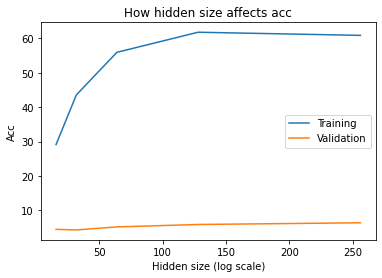

In [ ]:
import matplotlib.pyplot as plt
hs = [16, 32, 64, 128, 256]
accs_tr = [29.14, 43.56, 55.95, 61.78, 60.87]
accs_val = [4.49, 4.33, 5.20, 5.91, 6.40]
plt.plot(hs, accs_tr)
plt.plot(hs, accs_val)
plt.title('How hidden size affects acc')
plt.ylabel('Acc')
plt.xlabel('Hidden size (log scale)')
plt.legend(['Training','Validation'])
plt.show()

# Different learning rates and optimizers

## Adam, Learning rate: 0.01

In [6]:
model = RNN(n_output=32, n_hidden=500, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4354411122162416
Accuracy on training set:  5.903743315508021


 10%|█         | 1/10 [00:32<04:52, 32.52s/it]


Accuracy on validation set:  2.1647819063004845
--------------------

Loss on training set:  3.392301762265857
Accuracy on training set:  6.779103249691485


 20%|██        | 2/10 [01:04<04:19, 32.44s/it]


Accuracy on validation set:  4.20032310177706
--------------------

Loss on training set:  3.381138109644957
Accuracy on training set:  7.081859317153435


 30%|███       | 3/10 [01:37<03:46, 32.43s/it]


Accuracy on validation set:  3.8126009693053313
--------------------

Loss on training set:  3.3729476290090443
Accuracy on training set:  7.200329082682024


 40%|████      | 4/10 [02:09<03:14, 32.42s/it]


Accuracy on validation set:  2.617124394184168
--------------------

Loss on training set:  3.370186387147986
Accuracy on training set:  7.284245166598108


 50%|█████     | 5/10 [02:42<02:42, 32.46s/it]


Accuracy on validation set:  2.3909531502423262
--------------------

Loss on training set:  3.3688090073096317
Accuracy on training set:  7.3944878650761


 60%|██████    | 6/10 [03:14<02:10, 32.53s/it]


Accuracy on validation set:  3.5864297253634896
--------------------

Loss on training set:  3.3608559543965826
Accuracy on training set:  7.549156725627314


 70%|███████   | 7/10 [03:47<01:37, 32.55s/it]


Accuracy on validation set:  4.006462035541196
--------------------

Loss on training set:  3.358269202582682
Accuracy on training set:  7.420814479638009


 80%|████████  | 8/10 [04:20<01:05, 32.57s/it]


Accuracy on validation set:  3.974151857835218
--------------------

Loss on training set:  3.3576401445552775
Accuracy on training set:  7.427396133278486


 90%|█████████ | 9/10 [04:52<00:32, 32.54s/it]


Accuracy on validation set:  3.134087237479806
--------------------

Loss on training set:  3.3580312799691465
Accuracy on training set:  7.157548334018922


100%|██████████| 10/10 [05:24<00:00, 32.50s/it]


Accuracy on validation set:  3.1987075928917608
--------------------


In [9]:
evaluate_network(model, test_loader, correct_index)

Accuracy o test set:  3.2414910858995136


## Adam, Learning rate: 0.001

In [7]:
model2 = RNN(n_output=32, n_hidden=500, device=device)
model2.to(device)
optimizer = Adam(model2.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model2, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4184837212595904
Accuracy on training set:  5.398601398601398


 10%|█         | 1/10 [00:32<04:53, 32.63s/it]


Accuracy on validation set:  2.3909531502423262
--------------------

Loss on training set:  3.291911107608194
Accuracy on training set:  9.467708761826408


 20%|██        | 2/10 [01:05<04:21, 32.70s/it]


Accuracy on validation set:  3.295638126009693
--------------------

Loss on training set:  3.0504266716059907
Accuracy on training set:  16.02303578774167


 30%|███       | 3/10 [01:38<03:49, 32.74s/it]


Accuracy on validation set:  5.072697899838449
--------------------

Loss on training set:  2.7499592473309797
Accuracy on training set:  24.727272727272727


 40%|████      | 4/10 [02:10<03:16, 32.69s/it]


Accuracy on validation set:  4.975767366720517
--------------------

Loss on training set:  2.448201000644365
Accuracy on training set:  33.571369806663924


 50%|█████     | 5/10 [02:43<02:43, 32.65s/it]


Accuracy on validation set:  5.201938610662359
--------------------

Loss on training set:  2.1905935399476415
Accuracy on training set:  41.02838338132456


 60%|██████    | 6/10 [03:15<02:10, 32.56s/it]


Accuracy on validation set:  5.363489499192245
--------------------

Loss on training set:  1.98276212848395
Accuracy on training set:  47.18881118881119


 70%|███████   | 7/10 [03:48<01:37, 32.57s/it]


Accuracy on validation set:  5.4927302100161555
--------------------

Loss on training set:  1.8152131871223842
Accuracy on training set:  51.87988482106129


 80%|████████  | 8/10 [04:21<01:05, 32.67s/it]


Accuracy on validation set:  5.331179321486268
--------------------

Loss on training set:  1.677021314498575
Accuracy on training set:  56.100370218017275


 90%|█████████ | 9/10 [04:53<00:32, 32.67s/it]


Accuracy on validation set:  5.4281098546042
--------------------

Loss on training set:  1.5686081764071333
Accuracy on training set:  59.086795557383795


100%|██████████| 10/10 [05:26<00:00, 32.65s/it]


Accuracy on validation set:  5.55735056542811
--------------------


In [10]:
evaluate_network(model2, test_loader, correct_index)

Accuracy o test set:  5.672609400324149


## Adam, Learning rate: 0.0001

In [12]:
model3 = RNN(n_output=32, n_hidden=500, device=device)
model3.to(device)
optimizer = Adam(model3.parameters(), lr=0.0001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model3, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.444149767947462
Accuracy on training set:  4.523241464417935


 10%|█         | 1/10 [00:32<04:53, 32.63s/it]


Accuracy on validation set:  1.5508885298869144
--------------------

Loss on training set:  3.3641683679272343
Accuracy on training set:  10.64911559029206


 20%|██        | 2/10 [01:05<04:21, 32.65s/it]


Accuracy on validation set:  1.615508885298869
--------------------

Loss on training set:  3.2764780475690207
Accuracy on training set:  13.742492801316331


 30%|███       | 3/10 [01:38<03:48, 32.69s/it]


Accuracy on validation set:  2.035541195476575
--------------------

Loss on training set:  3.163500600788928
Accuracy on training set:  17.276840806252572


 40%|████      | 4/10 [02:11<03:16, 32.82s/it]


Accuracy on validation set:  2.9402261712439417
--------------------

Loss on training set:  3.033065974456398
Accuracy on training set:  20.88358700123406


 50%|█████     | 5/10 [02:44<02:44, 32.98s/it]


Accuracy on validation set:  3.4248788368336025
--------------------

Loss on training set:  2.9034208049130803
Accuracy on training set:  24.422871246400657


 60%|██████    | 6/10 [03:17<02:12, 33.05s/it]


Accuracy on validation set:  3.6510500807754442
--------------------

Loss on training set:  2.7842257288207444
Accuracy on training set:  27.46524064171123


 70%|███████   | 7/10 [03:50<01:39, 33.03s/it]


Accuracy on validation set:  3.9095315024232633
--------------------

Loss on training set:  2.6756259509870812
Accuracy on training set:  30.352941176470587


 80%|████████  | 8/10 [04:23<01:06, 33.04s/it]


Accuracy on validation set:  4.426494345718901
--------------------

Loss on training set:  2.576517813579382
Accuracy on training set:  33.22912381735911


 90%|█████████ | 9/10 [04:56<00:33, 33.02s/it]


Accuracy on validation set:  4.555735056542811
--------------------

Loss on training set:  2.485510066305841
Accuracy on training set:  35.63800904977376


100%|██████████| 10/10 [05:29<00:00, 33.00s/it]


Accuracy on validation set:  4.684975767366721
--------------------


In [13]:
evaluate_network(model3, test_loader, correct_index)

Accuracy o test set:  4.894651539708266


## Comparing training for Adam

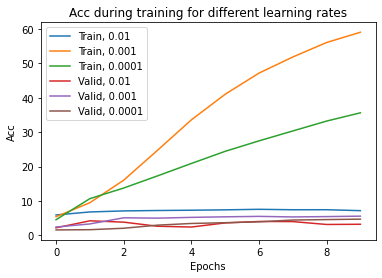

In [15]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
plt.plot(epochs, model.train_accuracy)
plt.plot(epochs, model2.train_accuracy)
plt.plot(epochs, model3.train_accuracy)
plt.plot(epochs, model.val_accuracy)
plt.plot(epochs, model2.val_accuracy)
plt.plot(epochs, model3.val_accuracy)

plt.title('Acc during training for different learning rates')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train, 0.01', 'Train, 0.001', 'Train, 0.0001',
            'Valid, 0.01', 'Valid, 0.001', 'Valid, 0.0001'])
plt.show()

## RMSProp, Learning rate: 0.01

In [6]:
model = RNN(n_output=32, n_hidden=256, device=device)
model.to(device)
optimizer = RMSprop(model.parameters(), lr=0.0001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.445383280703483
Accuracy on training set:  4.691073632250103


 10%|█         | 1/10 [00:27<04:05, 27.23s/it]


Accuracy on validation set:  1.518578352180937
--------------------

Loss on training set:  3.379016904340561
Accuracy on training set:  10.522418757712876


 20%|██        | 2/10 [00:46<03:19, 24.97s/it]


Accuracy on validation set:  1.4216478190630049
--------------------

Loss on training set:  3.3152926087389263
Accuracy on training set:  13.360756890168656


 30%|███       | 3/10 [01:06<02:43, 23.42s/it]


Accuracy on validation set:  1.6478190630048466
--------------------

Loss on training set:  3.239763004023663
Accuracy on training set:  16.095433977786918


 40%|████      | 4/10 [01:26<02:13, 22.30s/it]


Accuracy on validation set:  2.003231017770598
--------------------

Loss on training set:  3.149742600422541
Accuracy on training set:  18.9337721102427


 50%|█████     | 5/10 [01:46<01:47, 21.50s/it]


Accuracy on validation set:  2.4878836833602587
--------------------

Loss on training set:  3.0487947357676735
Accuracy on training set:  21.849444672974084


 60%|██████    | 6/10 [02:05<01:24, 21.00s/it]


Accuracy on validation set:  3.134087237479806
--------------------

Loss on training set:  2.9438478146007356
Accuracy on training set:  24.725627313862606


 70%|███████   | 7/10 [02:25<01:01, 20.63s/it]


Accuracy on validation set:  3.4248788368336025
--------------------

Loss on training set:  2.839798484117295
Accuracy on training set:  27.389551624845744


 80%|████████  | 8/10 [02:45<00:40, 20.41s/it]


Accuracy on validation set:  4.168012924071083
--------------------

Loss on training set:  2.741390087381894
Accuracy on training set:  29.754010695187166


 90%|█████████ | 9/10 [03:05<00:20, 20.23s/it]


Accuracy on validation set:  4.329563812600969
--------------------

Loss on training set:  2.648708031923866
Accuracy on training set:  32.100370218017275


100%|██████████| 10/10 [03:25<00:00, 20.51s/it]


Accuracy on validation set:  4.652665589660743
--------------------


In [7]:
evaluate_network(model, test_loader, correct_index)

Accuracy o test set:  4.1491085899513775


## RMSProp, Learning rate: 0.001

In [8]:
model2 = RNN(n_output=32, n_hidden=500, device=device)
model2.to(device)
optimizer = RMSprop(model2.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model2, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4132712072563094
Accuracy on training set:  5.3689839572192515


 10%|█         | 1/10 [00:21<03:13, 21.55s/it]


Accuracy on validation set:  2.4232633279483036
--------------------

Loss on training set:  3.2554363330721805
Accuracy on training set:  10.644179350061703


 20%|██        | 2/10 [00:43<02:52, 21.53s/it]


Accuracy on validation set:  3.6833602584814216
--------------------

Loss on training set:  2.983532564217345
Accuracy on training set:  18.41546688605512


 30%|███       | 3/10 [01:04<02:30, 21.54s/it]


Accuracy on validation set:  4.81421647819063
--------------------

Loss on training set:  2.673862613856866
Accuracy on training set:  26.869600987248045


 40%|████      | 4/10 [01:26<02:09, 21.50s/it]


Accuracy on validation set:  5.460420032310178
--------------------

Loss on training set:  2.391609041181821
Accuracy on training set:  35.21349238996298


 50%|█████     | 5/10 [01:47<01:47, 21.52s/it]


Accuracy on validation set:  5.589660743134087
--------------------

Loss on training set:  2.1564135401634363
Accuracy on training set:  41.96955985191279


 60%|██████    | 6/10 [02:09<01:26, 21.54s/it]


Accuracy on validation set:  5.977382875605816
--------------------

Loss on training set:  1.9566322740141329
Accuracy on training set:  47.93089263677499


 70%|███████   | 7/10 [02:31<01:05, 21.72s/it]


Accuracy on validation set:  5.525040387722132
--------------------

Loss on training set:  1.8010938595842796
Accuracy on training set:  52.49197860962567


 80%|████████  | 8/10 [02:53<00:43, 21.80s/it]


Accuracy on validation set:  5.298869143780291
--------------------

Loss on training set:  1.6704742094853542
Accuracy on training set:  56.126696832579185


 90%|█████████ | 9/10 [03:15<00:21, 21.87s/it]


Accuracy on validation set:  6.3974151857835215
--------------------

Loss on training set:  1.5627799643807232
Accuracy on training set:  59.086795557383795


100%|██████████| 10/10 [03:37<00:00, 21.73s/it]


Accuracy on validation set:  6.365105008077545
--------------------


In [9]:
evaluate_network(model2, test_loader, correct_index)

Accuracy o test set:  5.4457050243111835


## RMSProp, Learning rate: 0.0001

In [10]:
model3 = RNN(n_output=32, n_hidden=500, device=device)
model3.to(device)
optimizer = RMSprop(model3.parameters(), lr=0.0001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model3, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4405279202463204
Accuracy on training set:  4.998765939942411


 10%|█         | 1/10 [00:22<03:21, 22.44s/it]


Accuracy on validation set:  1.4539579967689822
--------------------

Loss on training set:  3.3572566835912645
Accuracy on training set:  10.86137392019745


 20%|██        | 2/10 [00:44<02:59, 22.39s/it]


Accuracy on validation set:  1.615508885298869
--------------------

Loss on training set:  3.2748156798028103
Accuracy on training set:  14.16536404771699


 30%|███       | 3/10 [01:06<02:36, 22.30s/it]


Accuracy on validation set:  2.003231017770598
--------------------

Loss on training set:  3.174677626053917
Accuracy on training set:  17.28013163307281


 40%|████      | 4/10 [01:28<02:13, 22.24s/it]


Accuracy on validation set:  2.5848142164781907
--------------------

Loss on training set:  3.059322728804726
Accuracy on training set:  20.541341011929248


 50%|█████     | 5/10 [01:51<01:51, 22.25s/it]


Accuracy on validation set:  3.263327948303716
--------------------

Loss on training set:  2.941974892426008
Accuracy on training set:  23.633072809543396


 60%|██████    | 6/10 [02:13<01:29, 22.33s/it]


Accuracy on validation set:  3.974151857835218
--------------------

Loss on training set:  2.82953937558763
Accuracy on training set:  26.36445907034142


 70%|███████   | 7/10 [02:35<01:06, 22.31s/it]


Accuracy on validation set:  4.168012924071083
--------------------

Loss on training set:  2.7247624201521567
Accuracy on training set:  29.030028794734676


 80%|████████  | 8/10 [02:58<00:44, 22.26s/it]


Accuracy on validation set:  4.684975767366721
--------------------

Loss on training set:  2.628027285819483
Accuracy on training set:  31.728506787330318


 90%|█████████ | 9/10 [03:20<00:22, 22.24s/it]


Accuracy on validation set:  4.975767366720517
--------------------

Loss on training set:  2.5380363002072532
Accuracy on training set:  33.99917729329494


100%|██████████| 10/10 [03:42<00:00, 22.23s/it]


Accuracy on validation set:  4.7819063004846525
--------------------


In [11]:
evaluate_network(model3, test_loader, correct_index)

Accuracy o test set:  4.700162074554295


## Comparing training for RMSprop

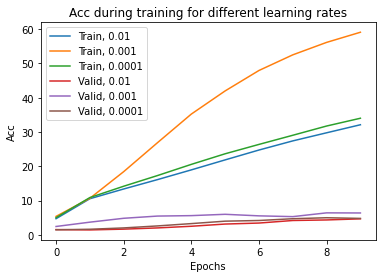

In [12]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
plt.plot(epochs, model.train_accuracy)
plt.plot(epochs, model2.train_accuracy)
plt.plot(epochs, model3.train_accuracy)
plt.plot(epochs, model.val_accuracy)
plt.plot(epochs, model2.val_accuracy)
plt.plot(epochs, model3.val_accuracy)

plt.title('Acc during training for different learning rates')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train, 0.01', 'Train, 0.001', 'Train, 0.0001',
            'Valid, 0.01', 'Valid, 0.001', 'Valid, 0.0001'])
plt.show()

# Stacked LSTMs
So far the best score of 7.95 on validation set

In [13]:
model = RNN(n_output=32, n_hidden=500, n_layers=2, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.421681362396893
Accuracy on training set:  4.417935006170301


 10%|█         | 1/10 [00:23<03:29, 23.27s/it]


Accuracy on validation set:  1.8416801292407108
--------------------

Loss on training set:  3.367376969124446
Accuracy on training set:  5.90703414232826


 20%|██        | 2/10 [00:46<03:06, 23.29s/it]


Accuracy on validation set:  3.295638126009693
--------------------

Loss on training set:  3.180160608527004
Accuracy on training set:  9.06951871657754


 30%|███       | 3/10 [01:09<02:42, 23.25s/it]


Accuracy on validation set:  4.555735056542811
--------------------

Loss on training set:  2.97158780442006
Accuracy on training set:  12.681201151789388


 40%|████      | 4/10 [01:33<02:19, 23.25s/it]


Accuracy on validation set:  6.30048465266559
--------------------

Loss on training set:  2.7498268399577923
Accuracy on training set:  17.777046482928835


 50%|█████     | 5/10 [01:56<01:56, 23.25s/it]


Accuracy on validation set:  4.2326332794830375
--------------------

Loss on training set:  2.480809577559797
Accuracy on training set:  25.494035376388318


 60%|██████    | 6/10 [02:19<01:32, 23.24s/it]


Accuracy on validation set:  5.621970920840065
--------------------

Loss on training set:  2.171699165075907
Accuracy on training set:  34.96668037844508


 70%|███████   | 7/10 [02:42<01:09, 23.24s/it]


Accuracy on validation set:  7.399030694668821
--------------------

Loss on training set:  1.8737634667169405
Accuracy on training set:  44.25174825174825


 80%|████████  | 8/10 [03:05<00:46, 23.22s/it]


Accuracy on validation set:  7.754442649434572
--------------------

Loss on training set:  1.6328460430108387
Accuracy on training set:  51.67091731797614


 90%|█████████ | 9/10 [03:29<00:23, 23.25s/it]


Accuracy on validation set:  6.558966074313409
--------------------

Loss on training set:  1.4503417473023734
Accuracy on training set:  57.10736322501028


100%|██████████| 10/10 [03:52<00:00, 23.23s/it]


Accuracy on validation set:  7.948303715670436
--------------------


In [14]:
evaluate_network(model, test_loader, correct_index)

Accuracy o test set:  7.163695299837926


In [15]:
model2 = RNN(n_output=32, n_hidden=500, device=device)
model2.to(device)
optimizer = Adam(model2.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model2, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.4182172853610293
Accuracy on training set:  5.352529823118059


 10%|█         | 1/10 [00:22<03:23, 22.57s/it]


Accuracy on validation set:  2.4232633279483036
--------------------

Loss on training set:  3.290105615978327
Accuracy on training set:  9.563142739613328


 20%|██        | 2/10 [00:45<03:00, 22.56s/it]


Accuracy on validation set:  3.8449111470113086
--------------------

Loss on training set:  3.051558304664678
Accuracy on training set:  16.06910736322501


 30%|███       | 3/10 [01:07<02:38, 22.59s/it]


Accuracy on validation set:  5.363489499192245
--------------------

Loss on training set:  2.751955269080334
Accuracy on training set:  24.552858905800083


 40%|████      | 4/10 [01:30<02:15, 22.55s/it]


Accuracy on validation set:  5.621970920840065
--------------------

Loss on training set:  2.4488390425858992
Accuracy on training set:  33.34594816947758


 50%|█████     | 5/10 [01:52<01:52, 22.57s/it]


Accuracy on validation set:  4.94345718901454
--------------------

Loss on training set:  2.192943857966603
Accuracy on training set:  41.07116412998766


 60%|██████    | 6/10 [02:15<01:30, 22.57s/it]


Accuracy on validation set:  6.17124394184168
--------------------

Loss on training set:  1.976740724594198
Accuracy on training set:  47.211846976552856


 70%|███████   | 7/10 [02:37<01:07, 22.55s/it]


Accuracy on validation set:  5.815831987075929
--------------------

Loss on training set:  1.8139181207227688
Accuracy on training set:  52.01480872069107


 80%|████████  | 8/10 [03:00<00:45, 22.53s/it]


Accuracy on validation set:  5.395799676898223
--------------------

Loss on training set:  1.6801864544014438
Accuracy on training set:  55.9572192513369


 90%|█████████ | 9/10 [03:22<00:22, 22.47s/it]


Accuracy on validation set:  5.783521809369952
--------------------

Loss on training set:  1.5604958561583833
Accuracy on training set:  59.31879884821061


100%|██████████| 10/10 [03:45<00:00, 22.53s/it]


Accuracy on validation set:  5.751211631663974
--------------------


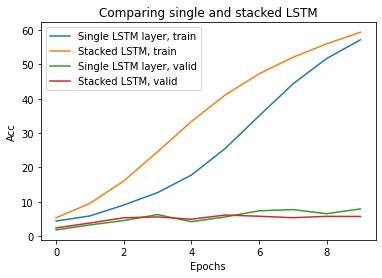

In [16]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
plt.plot(epochs, model.train_accuracy)
plt.plot(epochs, model2.train_accuracy)
plt.plot(epochs, model.val_accuracy)
plt.plot(epochs, model2.val_accuracy)

plt.title('Comparing single and stacked LSTM')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Single LSTM layer, train', 'Stacked LSTM, train',
            'Single LSTM layer, valid', 'Stacked LSTM, valid'])
plt.show()

# Weight decay = 0.00001 instead of 0.0001

In [4]:
model = RNN(n_output=32, n_hidden=500, n_layers=2, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.3601398509601075
Accuracy on training set:  5.74578362813657


 10%|█         | 1/10 [00:23<03:29, 23.25s/it]


Accuracy on validation set:  4.038772213247173
--------------------

Loss on training set:  2.9145968640561657
Accuracy on training set:  15.83710407239819


 20%|██        | 2/10 [00:43<02:58, 22.28s/it]


Accuracy on validation set:  5.718901453957997
--------------------

Loss on training set:  2.014230381345023
Accuracy on training set:  41.81489099136158


 30%|███       | 3/10 [01:03<02:31, 21.62s/it]


Accuracy on validation set:  6.591276252019386
--------------------

Loss on training set:  1.2126617586401842
Accuracy on training set:  65.48251748251748


 40%|████      | 4/10 [01:23<02:06, 21.12s/it]


Accuracy on validation set:  7.625201938610663
--------------------

Loss on training set:  0.8213413612874925
Accuracy on training set:  77.0234471410942


 50%|█████     | 5/10 [01:43<01:43, 20.78s/it]


Accuracy on validation set:  6.720516962843296
--------------------

Loss on training set:  0.6593125150999087
Accuracy on training set:  81.47099958864665


 60%|██████    | 6/10 [02:03<01:22, 20.54s/it]


Accuracy on validation set:  7.915993537964459
--------------------

Loss on training set:  0.552692046418498
Accuracy on training set:  84.57095845331139


 70%|███████   | 7/10 [02:23<01:01, 20.34s/it]


Accuracy on validation set:  5.8481421647819065
--------------------

Loss on training set:  0.43047856674327717
Accuracy on training set:  88.01151789387083


 80%|████████  | 8/10 [02:43<00:40, 20.28s/it]


Accuracy on validation set:  7.237479806138934
--------------------

Loss on training set:  0.3761841849401035
Accuracy on training set:  89.49568078979844


 90%|█████████ | 9/10 [03:03<00:20, 20.19s/it]


Accuracy on validation set:  7.1082390953150245
--------------------

Loss on training set:  0.36831719921430606
Accuracy on training set:  89.7145207733443


100%|██████████| 10/10 [03:23<00:00, 20.32s/it]


Accuracy on validation set:  6.074313408723748
--------------------


In [5]:
evaluate_network(model, test_loader, correct_index)

Accuracy o test set:  5.478119935170178


## For smaller number of features in hidden state

In [7]:
model = RNN(n_output=32, n_hidden=128, n_layers=2, device=device)
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.3693829147553847
Accuracy on training set:  5.6964212258329905


 10%|█         | 1/10 [00:18<02:47, 18.66s/it]


Accuracy on validation set:  2.9402261712439417
--------------------

Loss on training set:  2.9975102885727627
Accuracy on training set:  12.761826408885232


 20%|██        | 2/10 [00:37<02:29, 18.68s/it]


Accuracy on validation set:  4.7819063004846525
--------------------

Loss on training set:  2.439117609739598
Accuracy on training set:  27.700534759358288


 30%|███       | 3/10 [00:56<02:10, 18.71s/it]


Accuracy on validation set:  6.009693053311794
--------------------

Loss on training set:  1.8013460324517694
Accuracy on training set:  47.39613327848622


 40%|████      | 4/10 [01:14<01:52, 18.75s/it]


Accuracy on validation set:  6.138933764135703
--------------------

Loss on training set:  1.3052132389722955
Accuracy on training set:  62.34800493624023


 50%|█████     | 5/10 [01:33<01:33, 18.76s/it]


Accuracy on validation set:  6.623586429725363
--------------------

Loss on training set:  0.9825448053964908
Accuracy on training set:  72.36692719045661


 60%|██████    | 6/10 [01:52<01:15, 18.78s/it]


Accuracy on validation set:  7.4959612277867524
--------------------

Loss on training set:  0.787255366936185
Accuracy on training set:  78.00740436034553


 70%|███████   | 7/10 [02:11<00:56, 18.78s/it]


Accuracy on validation set:  6.138933764135703
--------------------

Loss on training set:  0.6710641859029851
Accuracy on training set:  81.21760592348828


 80%|████████  | 8/10 [02:30<00:37, 18.79s/it]


Accuracy on validation set:  6.17124394184168
--------------------

Loss on training set:  0.5823010190079507
Accuracy on training set:  83.83710407239819


 90%|█████████ | 9/10 [02:49<00:18, 18.81s/it]


Accuracy on validation set:  5.460420032310178
--------------------

Loss on training set:  0.5055809228060325
Accuracy on training set:  86.02879473467709


100%|██████████| 10/10 [03:07<00:00, 18.78s/it]


Accuracy on validation set:  6.332794830371567
--------------------


In [8]:
evaluate_network(model, test_loader, correct_index)

Accuracy o test set:  5.478119935170178


## Dropout = 0.2

In [9]:
class RNN(nn.Module):
    def __init__(self, device, n_input=16000, n_hidden=128, n_layers=2, n_classes=30):
        super(RNN, self).__init__()
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.lstm = nn.LSTM(n_input, n_hidden, n_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(n_hidden, n_classes)
        self.device = device

    def forward(self, x):
        # Set initial hidden and cell states
        batch_size = x.size(0)
        h0 = torch.zeros(self.n_layers, batch_size, self.n_hidden).requires_grad_().to(self.device) 
        c0 = torch.zeros(self.n_layers, batch_size, self.n_hidden).requires_grad_().to(self.device)

        # Forward propagate LSTM
        x, _ = self.lstm(x, (h0.detach(), c0.detach()))  # shape = (batch_size, seq_length, hidden_size)
        x = self.fc(x[:, -1, :])
        return F.log_softmax(x, dim=1) 

model = RNN(n_classes=32, device=device)

model.to(device)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_network(model, train_loader, val_loader, correct_index, 10, optimizer=optimizer, print_results=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Loss on training set:  3.3831686420707436
Accuracy on training set:  5.385438091320444


 10%|█         | 1/10 [00:18<02:50, 18.89s/it]


Accuracy on validation set:  2.1647819063004845
--------------------

Loss on training set:  3.0470312237043236
Accuracy on training set:  11.995063759769643


 20%|██        | 2/10 [00:37<02:30, 18.87s/it]


Accuracy on validation set:  5.525040387722132
--------------------

Loss on training set:  2.6058034144816995
Accuracy on training set:  23.30234471410942


 30%|███       | 3/10 [00:56<02:12, 18.88s/it]


Accuracy on validation set:  6.365105008077545
--------------------

Loss on training set:  2.153928619535408
Accuracy on training set:  36.584121760592346


 40%|████      | 4/10 [01:15<01:53, 18.86s/it]


Accuracy on validation set:  6.332794830371567
--------------------

Loss on training set:  1.7907226070735935
Accuracy on training set:  47.5820649938297


 50%|█████     | 5/10 [01:34<01:34, 18.85s/it]


Accuracy on validation set:  6.235864297253635
--------------------

Loss on training set:  1.5212174670346132
Accuracy on training set:  55.287535993418345


 60%|██████    | 6/10 [01:53<01:15, 18.85s/it]


Accuracy on validation set:  6.17124394184168
--------------------

Loss on training set:  1.3364919827142305
Accuracy on training set:  60.94117647058823


 70%|███████   | 7/10 [02:11<00:56, 18.82s/it]


Accuracy on validation set:  7.172859450726979
--------------------

Loss on training set:  1.1960265170885476
Accuracy on training set:  64.78650761003702


 80%|████████  | 8/10 [02:30<00:37, 18.81s/it]


Accuracy on validation set:  6.365105008077545
--------------------

Loss on training set:  1.101200696932637
Accuracy on training set:  67.64129987659399


 90%|█████████ | 9/10 [02:49<00:18, 18.84s/it]


Accuracy on validation set:  6.462035541195476
--------------------

Loss on training set:  1.0173734874795954
Accuracy on training set:  70.04360345536816


100%|██████████| 10/10 [03:08<00:00, 18.84s/it]


Accuracy on validation set:  6.752827140549273
--------------------


In [10]:
evaluate_network(model, test_loader, correct_index)

Accuracy o test set:  5.834683954619125


No improvement, stacked LSTMs for 500 features in hidden state and decay = 0.0001 gave better results.
